# Credit Card Fraud Detection
### Anonymized credit card transactions labeled as fraudulent or genuine

#### Context
- It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
- The datasets contains transactions made by credit cards in September 2013 by european cardholders.

- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

#### Inspiration
- Identify fraudulent credit card transactions.

- It is recommended measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [1]:
# import the tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Read the data

In [2]:
comp_df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

# Basic data analysis

In [3]:
comp_df.shape

(284807, 31)

In [4]:
comp_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
comp_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

- All is float64 besides Class

In [6]:
comp_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
comp_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing data in the dataset.

# Data EDA

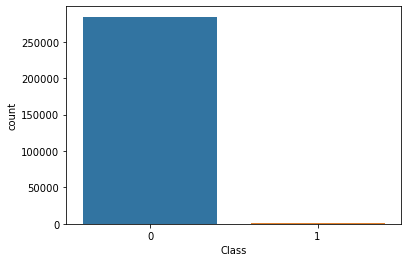

In [8]:
sns.countplot('Class',data=comp_df)

- The data is extrmely imbalanced, only 0.172% class 1 data.

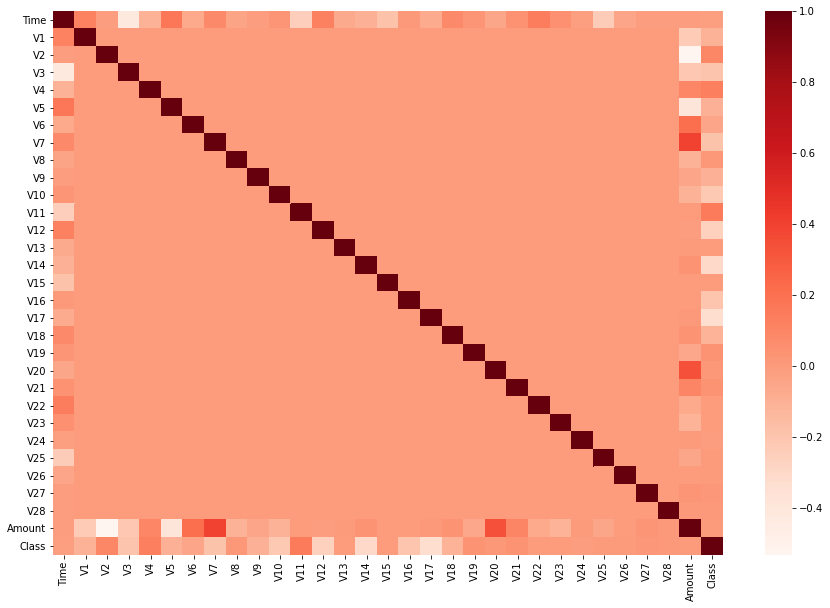

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(comp_df.corr(),cmap='Reds')

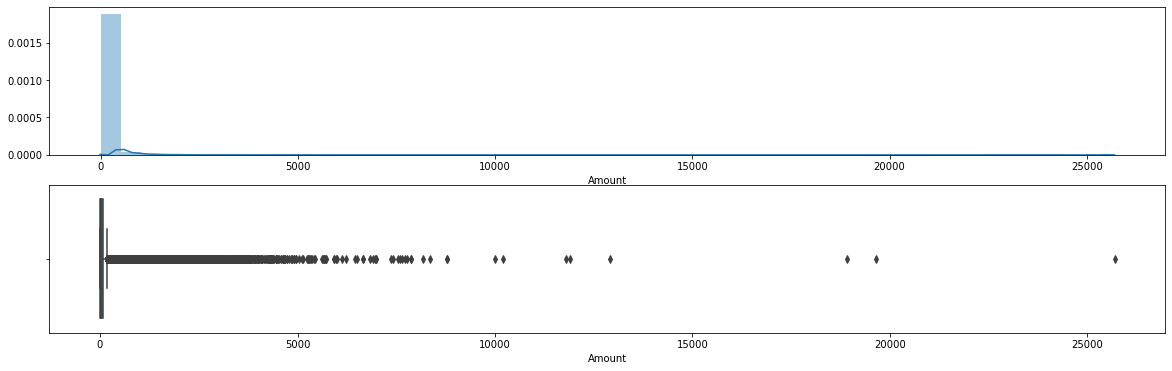

In [10]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,6))
sns.distplot(comp_df.Amount,ax=ax1)
sns.boxplot(comp_df.Amount, ax=ax2)

- The variance of amount is quite large, there are so many outliers in the data.

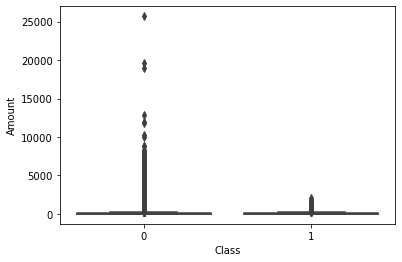

In [11]:
sns.boxplot(x='Class',y='Amount',data=comp_df)

- The money amount for fraud transaction are not high as normal transaction.

### Time

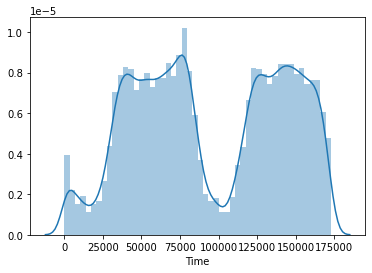

In [12]:
sns.distplot(comp_df.Time)

In [13]:
# Transfer the time to hour
comp_df['hour'] = (comp_df['Time']/60/60).astype(int)

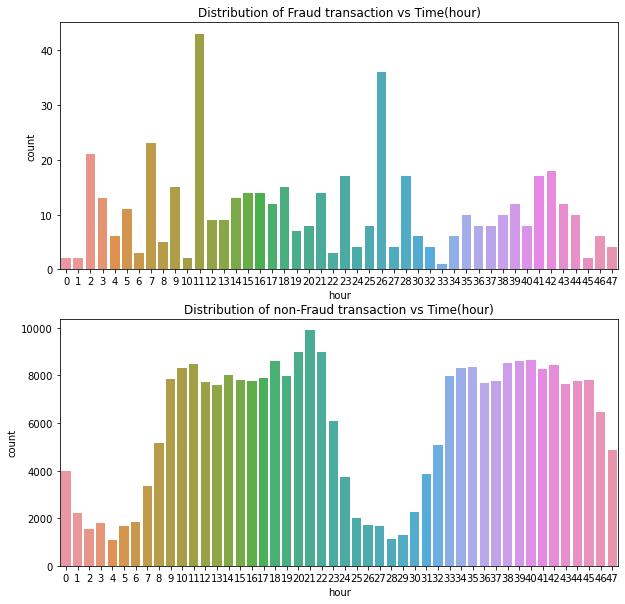

In [14]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.set_title('Distribution of Fraud transaction vs Time(hour)')
ax1.set_xlabel('Number of Fraud transaction')
sns.countplot(comp_df[comp_df.Class==1]['hour'], ax=ax1)
ax2.set_title('Distribution of non-Fraud transaction vs Time(hour)')
sns.countplot(comp_df[comp_df.Class==0]['hour'], ax=ax2)

In [15]:
comp_df.drop('hour',axis=1,inplace=True)

# Features Engineering

#### Drop the outliers

In [16]:
# Drop the outlier 
# Won't drop the outlier in class 1 
# Check the number of outliers
from scipy.stats import iqr
upper_limit = comp_df.Amount.quantile(0.75) + (1.5*iqr(comp_df.Amount))
print(upper_limit)
print(comp_df[comp_df.Amount>upper_limit]['Class'].value_counts())

184.5125
0    31813
1       91
Name: Class, dtype: int64


- There are 31904 outliers, 91 of them are in class 1
- lets make the threshold higher to 5000.

In [17]:
print(comp_df[comp_df.Amount>5000]['Class'].value_counts())

0    55
Name: Class, dtype: int64


In [18]:
comp_df = comp_df[comp_df.Amount <= 5000]

#### Standardize all numerical column

In [19]:
from sklearn.preprocessing import StandardScaler
scaler_df = comp_df.drop('Class',axis=1)
scaler_df = StandardScaler().fit_transform(scaler_df)
scaler_df = pd.DataFrame(scaler_df)

# Split the data into training set and test set
- There is no test data provided in this project, so train_test_split to split the data

In [20]:
from sklearn.model_selection import train_test_split
from collections import Counter

In [21]:
x_df = scaler_df.copy()
y_df = np.asarray(comp_df['Class'])

In [22]:
x_train, x_test, y_train,y_test = train_test_split(x_df,y_df, test_size=0.3,random_state=11)

In [23]:
#Check the shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((199326, 30), (85426, 30), (199326,), (85426,))

In [24]:
print('Class 1 in training set: {:.2f} %'.format(Counter(y_train)[1]/Counter(y_train)[0]*100))
print('Clas 1 in test set: {:.2f} %'.format(Counter(y_test)[1]/Counter(y_test)[0]*100))

Class 1 in training set: 0.17 %
Clas 1 in test set: 0.18 %


# Start training model

In [25]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,plot_precision_recall_curve
np.random.seed = 42

In [26]:
# Create a function for evaluation
def evaluation(clf, x, y):
    pred = clf.predict(x)
    print(classification_report(y, pred))
    print('ROC score:',roc_auc_score(y, pred))
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
    plot_precision_recall_curve(clf,x, y,ax=ax1)
    sns.heatmap(confusion_matrix(y, pred),annot=True, fmt='d',cmap='Reds', ax=ax2,)
    ax2.set_xlabel('Pred')
    ax2.set_ylabel('True')

### Try without undersampling and oversampling

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85276
           1       0.90      0.75      0.82       150

    accuracy                           1.00     85426
   macro avg       0.95      0.88      0.91     85426
weighted avg       1.00      1.00      1.00     85426

ROC score: 0.8765963068936942


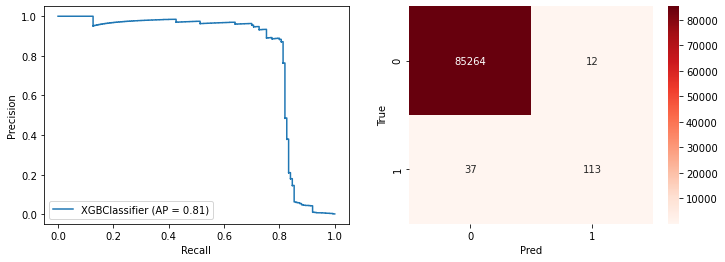

In [27]:
clf = XGBClassifier().fit(x_train,y_train)
evaluation(clf,x_test,y_test)

- It is so suprising that XGBoost did a really great job without any tuning.

- Both precision and recall are not bad. 

### Modifing the training data using SMOTE

#### Oversampling the data using SMOTE

In [28]:
# This time I use oversampling only.
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler()

steps = [
    #('under',under),
    ('over',over)
]
xs, ys = Pipeline(steps=steps).fit_resample(x_train,y_train)
print('The new ratio of data:',Counter(ys))

The new ratio of data: Counter({0: 198984, 1: 59695})


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85276
           1       0.84      0.82      0.83       150

    accuracy                           1.00     85426
   macro avg       0.92      0.91      0.92     85426
weighted avg       1.00      1.00      1.00     85426

ROC score: 0.9098651437684694


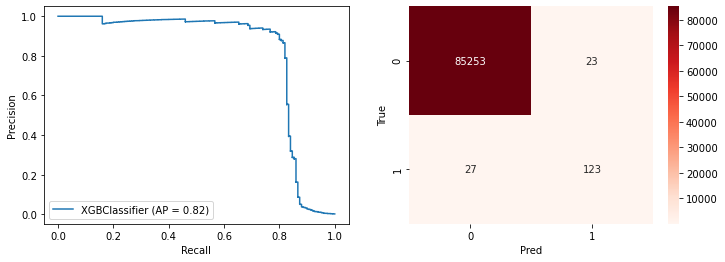

In [29]:
# fit the transformed data to the classifier.
clf = XGBClassifier().fit(xs,ys)
evaluation(clf,x_test,y_test)

- Although using SMOTE on the data ,we get a more balanced model.


### Tuning the hyperparameter for XGBoost

- We can tune the hyperparameter for XGBClassifier to get a more balanced model, but it uses many time for tuning.

In [30]:
#params = {
    #'n_estimators':[50,100,200],
    #'max_depth':[3,6,9],
    #'learning_rate':[0.001,0.01,0.1],
    #'subsample':[0.3,0.7,1],
    #'colsample_bytree':[0.3,0.7,1]
#}
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2,random_state=11)
#grid = GridSearchCV(XGBClassifier(random_state=11),params,cv=cv,n_jobs=-1,verbose=True,scoring='f1')
#grid.fit(xs, ys)
#print(grid.best_estimator_)

# Thank you very much